# CS235 Project


The goal of this project is to correctly classify any particular pokemon’s type from the image of the pokemon or from other attributes of the pokemon using ConvNets and linear regression respectively.  There are a total of  eighteen different Pokémon types which include but are not limited to Poison, Ground, Rock, Bug, Ghost, Steel, and Fire to name a few. In addition, there are 8 attributes that all pokemon have for instance HP, Attack, and Defense. Furthermore, pokemon are not limited to one single type, some of them can have 2 types. This will make classifying both types more tricky since with only one type we would have 1/18 chance of getting it right if we guess, however with the addition of the second type we now have a 171 permutations or 1/171 chance about being correct just by guessing. However the real number of types is 136 since a lot of the possible combinations have not yet been used on any pokemon.  In order to achieve decent performance we will need our models to find high other representations in of the data. We do not expect to get high performance, since even human performance in this data would be far from perfect. Some instances like Charmander are pretty obvious to be fire type  simply from the color and the flame on its tail however, some might confuse it for a dragon type as well which is incorrect.  One of the methods that we will be using is a convolutional neural network since it is known to achieve good performance on image classification task. The other method that we will be using will be logistic regression to on attribute data. We hope the a linear combination of  the attributes will be have some hints of the types of the pokemon but think that is unrealistic considering that the pokemon attributes are balanced. 


The two data sets can be found here:

[6036 label pokemon pictures ](https://www.kaggle.com/hannesrosenbusch/6036-labeled-pokemon-pictures#poke_image_data.npy)


[Better data all 7 Generations of Pokemon](https://github.com/udacity/AIPND/blob/master/Matplotlib/data/pokemon.csv)

<img src="Proposal image.jpg">




# TODO

Data Cleaning $\checkmark$

Data integration $\checkmark$

Data Augmentation $\checkmark$ 

Image train/test/validation sets  $\checkmark$ 

Data statistics(Mode, Histograms, scatterplots, HeatMap)

Predictive models 
* k nearest neighbor
* Logistic Regression
* CovNet


In [2]:
#imports
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as plt
from PIL import Image
import cv2
# %matplotlib inline
# plt.rcParams["figure.figsize"] = (16, 9) # (w, h)

## Data Integration
For Data integration, we plan to incorporate all different aspects of a pokemon from different datasets and see how this affects our classification. For example, while one dataset has the images of each pokemon, the other has some of their main attributes and pokedex numbers etc. We want to see how incorporating both sets vs using a single set will affect our classification


In [ ]:
import os0
import numpy as np 
import pandas as pd 


#load files to integrate 
image_labels = pd.read_csv('old_image_lables.csv', usecols= ['Name'], header = 'infer')
stats_data = pd.read_csv('pokemon_final.csv', usecols= ['Name', 'Type 1', 'Type 2'], header = 'infer')

#Create out file with names maching images 
out_file = image_labels

#Appends the types to the name 
Type1 = pd.Series([])
Type2 = pd.Series([])
names = {'None missing'}
for i in range(len(image_labels)):
    row = None
    name = image_labels.iloc[i]['Name']
    if(((stats_data['Name']== name.lower()).any())):
        row = stats_data.loc[stats_data['Name']==name.lower()]
        Type1[i] = row.iat[0,1]
        Type2[i] = row.iat[0,2]
    else:
        #Display name of missing pokemon 
        names.add(name)
#Display all missing pokemon
print(names)
    
out_file.insert(loc=1, column = 'Type 1', value = Type1)
out_file.insert(loc=2, column = 'Type 2', value = Type2)

out_file.head()
    
out_file.to_csv('poke_image_labels.csv') #Write to file 


## Data augmentation
The dataset that we are using has 6036 images. Our goal is to use data augmentation to 10 fold the amount of images that we have by performing image manipulation like cropping, inverting, flipping, rotating, and increasing or decreasing the brightness, and saturation all the images. We hope that by doing this out convolutional neural network will become more robust and perform better on new data. 
We intend to make somewhere around 60k images and use 50k for training and 10k for testing. 


### Original Image

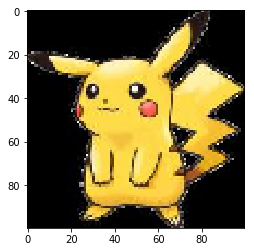

In [2]:
data = np.load('/home/onil/Documents/CS235/poke_image_data.npy')
image = data[3951] #pikachu
# #How do the images look like? Example:
example_pic = Image.fromarray(image, 'RGB')
plt.imshow(example_pic)

### First change the background of all images to white

(6036, 100, 100, 3)
(6036, 100, 100, 3)


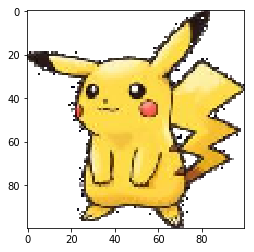

In [3]:
#read in data
labels = pd.read_csv('poke_image_labels.csv', header = 'infer')
data = np.load('/home/onil/Documents/CS235/poke_image_data.npy')

print(data.shape)
image = data[20]

new_images = []
for i in range(data.shape[0]):
    image = np.copy(data[i])
    #change image background 
    image[np.all(image <= [20, 20, 20], axis= 2)] = [255,255,255]
    new_images.append(image)

new_images = np.array(new_images)
print(new_images.shape)   
np.save("poke96k.npy", new_images)

image = new_images[3951] #pikachu

# #How do the images look like? Example:
example_pic = Image.fromarray(image, 'RGB')
plt.imshow(example_pic)

### Append horizotal flip images

(6036, 100, 100, 3)
(12072, 100, 100, 3)


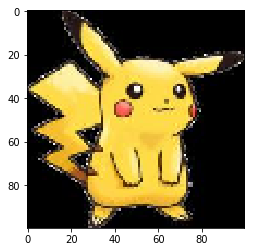

In [11]:
#read data
labels = pd.read_csv('poke_image_labels.csv', header = 'infer')
data = np.load('/home/onil/Documents/CS235/poke_image_data.npy')
print(data.shape)
image = data[1000]

#Flip images horizontally 
new_images = []
for i in range(data.shape[0]):
    image = np.copy(data[i])
    #change image background 
    image = image[:, ::-1]
    new_images.append(image)

new_images = np.array(new_images)
new_images = np.vstack((data, new_images))
print(new_images.shape)   
np.save("poke96k.npy", new_images)

image = new_images[3951+6036] #pikachu

example_pic = Image.fromarray(image, 'RGB')
plt.imshow(example_pic)


#Stack the lables 
labels = pd.concat([labels,labels], axis=0)
labels.to_csv('poke_image_labels_96k.csv')

### Change brightness 

(12072, 100, 100, 3)
(36216, 100, 100, 3)


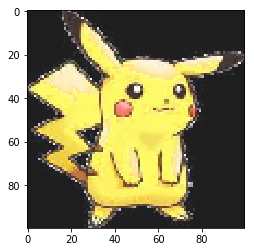

In [12]:
#read data
labels = pd.read_csv('poke_image_labels_96k.csv', header = 'infer')
data = np.load('poke96k.npy')
print(data.shape)
image = data[100]

brightness = 30
darken = -30
new_images1 = []
new_images2 = []
for i in range(data.shape[0]):
    limage =np.copy(data[i])
    dimage =np.copy(data[i])
    limage[limage < [255-brightness,255-brightness,255-brightness]] += brightness
    dimage[dimage > [brightness,brightness,brightness]] -= brightness
    new_images1.append(limage)
    new_images2.append(dimage)
    


new_images1 = np.array(new_images1)
new_images2 = np.array(new_images2)
new_images1 = np.vstack((data, new_images1,new_images2))
print(new_images1.shape)   
np.save("poke96k.npy", new_images1)

image = new_images1[3951+6036*3]

example_pic = Image.fromarray(image, 'RGB')
plt.imshow(example_pic)

#Stack the lables 
labels = pd.concat([labels,labels,labels], axis=0)
labels.to_csv('poke_image_labels_96k.csv')

### Crop images 3 different ways 
<div class="alert alert-success">
Warning requires 16GB of memory to execute next box
</div>

In [17]:
#smart crop delete as much of the back background around each pokemon 
def smart_crop(im, bg = 'black'):
    changed = False
    if(bg == 'black'):
        target = [0,0,0]
    else: 
        target = [255,255,255]
    top, down , left ,right = 0,im.shape[0],0,im.shape[0]
    
    while top < im.shape[0]:
            if((im[:top] == target).all()):
                changed = True
                top+=1
            else:
                top-=1
                break 
    while down > 0:
            if((im[down:] == target).all()):
                down-=1
                changed = True
            else:
                down+=1
                break
    while left < im.shape[0]:
            if((im[:,:left:] == target).all()):
                left+=1
                changed = True
            else:
                left-=1
                break 
    while right > 0:
            if((im[:,right::] == target).all()):
                right-=1
                changed = True
            else:
                right+=1
                break
    return top, down , left ,right, changed

(36216, 100, 100, 3)
(108648, 100, 100, 3)


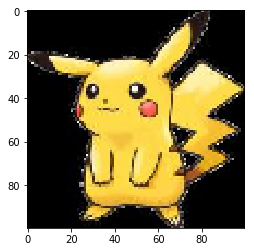

In [19]:
#read data
labels = pd.read_csv('poke_image_labels_96k.csv', header = 'infer')
data = np.load("poke96k.npy")
print(data.shape)
image1 = data[8]
image2 = data[8]
image3 = data[8]

new_images1 = []
new_images2 = []
#new_images3 = []
for i in range(data.shape[0]):
    image1 = np.copy(data[i])
    image2 = np.copy(data[i])
    top, down , left ,right, changed = smart_crop(image1, bg = 'black')
    if(changed):
        image1 = cv2.resize(image1[top:down,left:right:], dsize=(100, 100), interpolation=cv2.INTER_CUBIC)
    else:
        image1 = cv2.resize(image1[5:95,5:95:], dsize=(100, 100), interpolation=cv2.INTER_CUBIC)
    top, down , left ,right, changed = smart_crop(image1, bg = 'white')
    if(changed):
        image2 = cv2.resize(image2[top:down,left:right:], dsize=(100, 100), interpolation=cv2.INTER_CUBIC)
    else:
        image2 = cv2.resize(image2[3:97,3:97:], dsize=(100, 100), interpolation=cv2.INTER_CUBIC)
    new_images1.append(image1)
    new_images2.append(image2)

new_images1 = np.array(new_images1)
new_images2 = np.array(new_images2)
new_images1 = np.vstack((data, new_images1, new_images2))
print(new_images1.shape)   
np.save("poke96k.npy", new_images1)

image3 = new_images1[3951+6036*6]
# example_pic = Image.fromarray(image[10:60,20:80:], 'RGB')
example_pic = Image.fromarray(image3, 'RGB')
plt.imshow(example_pic)

#Stack the lables 
labels = pd.concat([labels, labels, labels], axis=0)
labels.to_csv('poke_image_labels_96k.csv')

### Final results

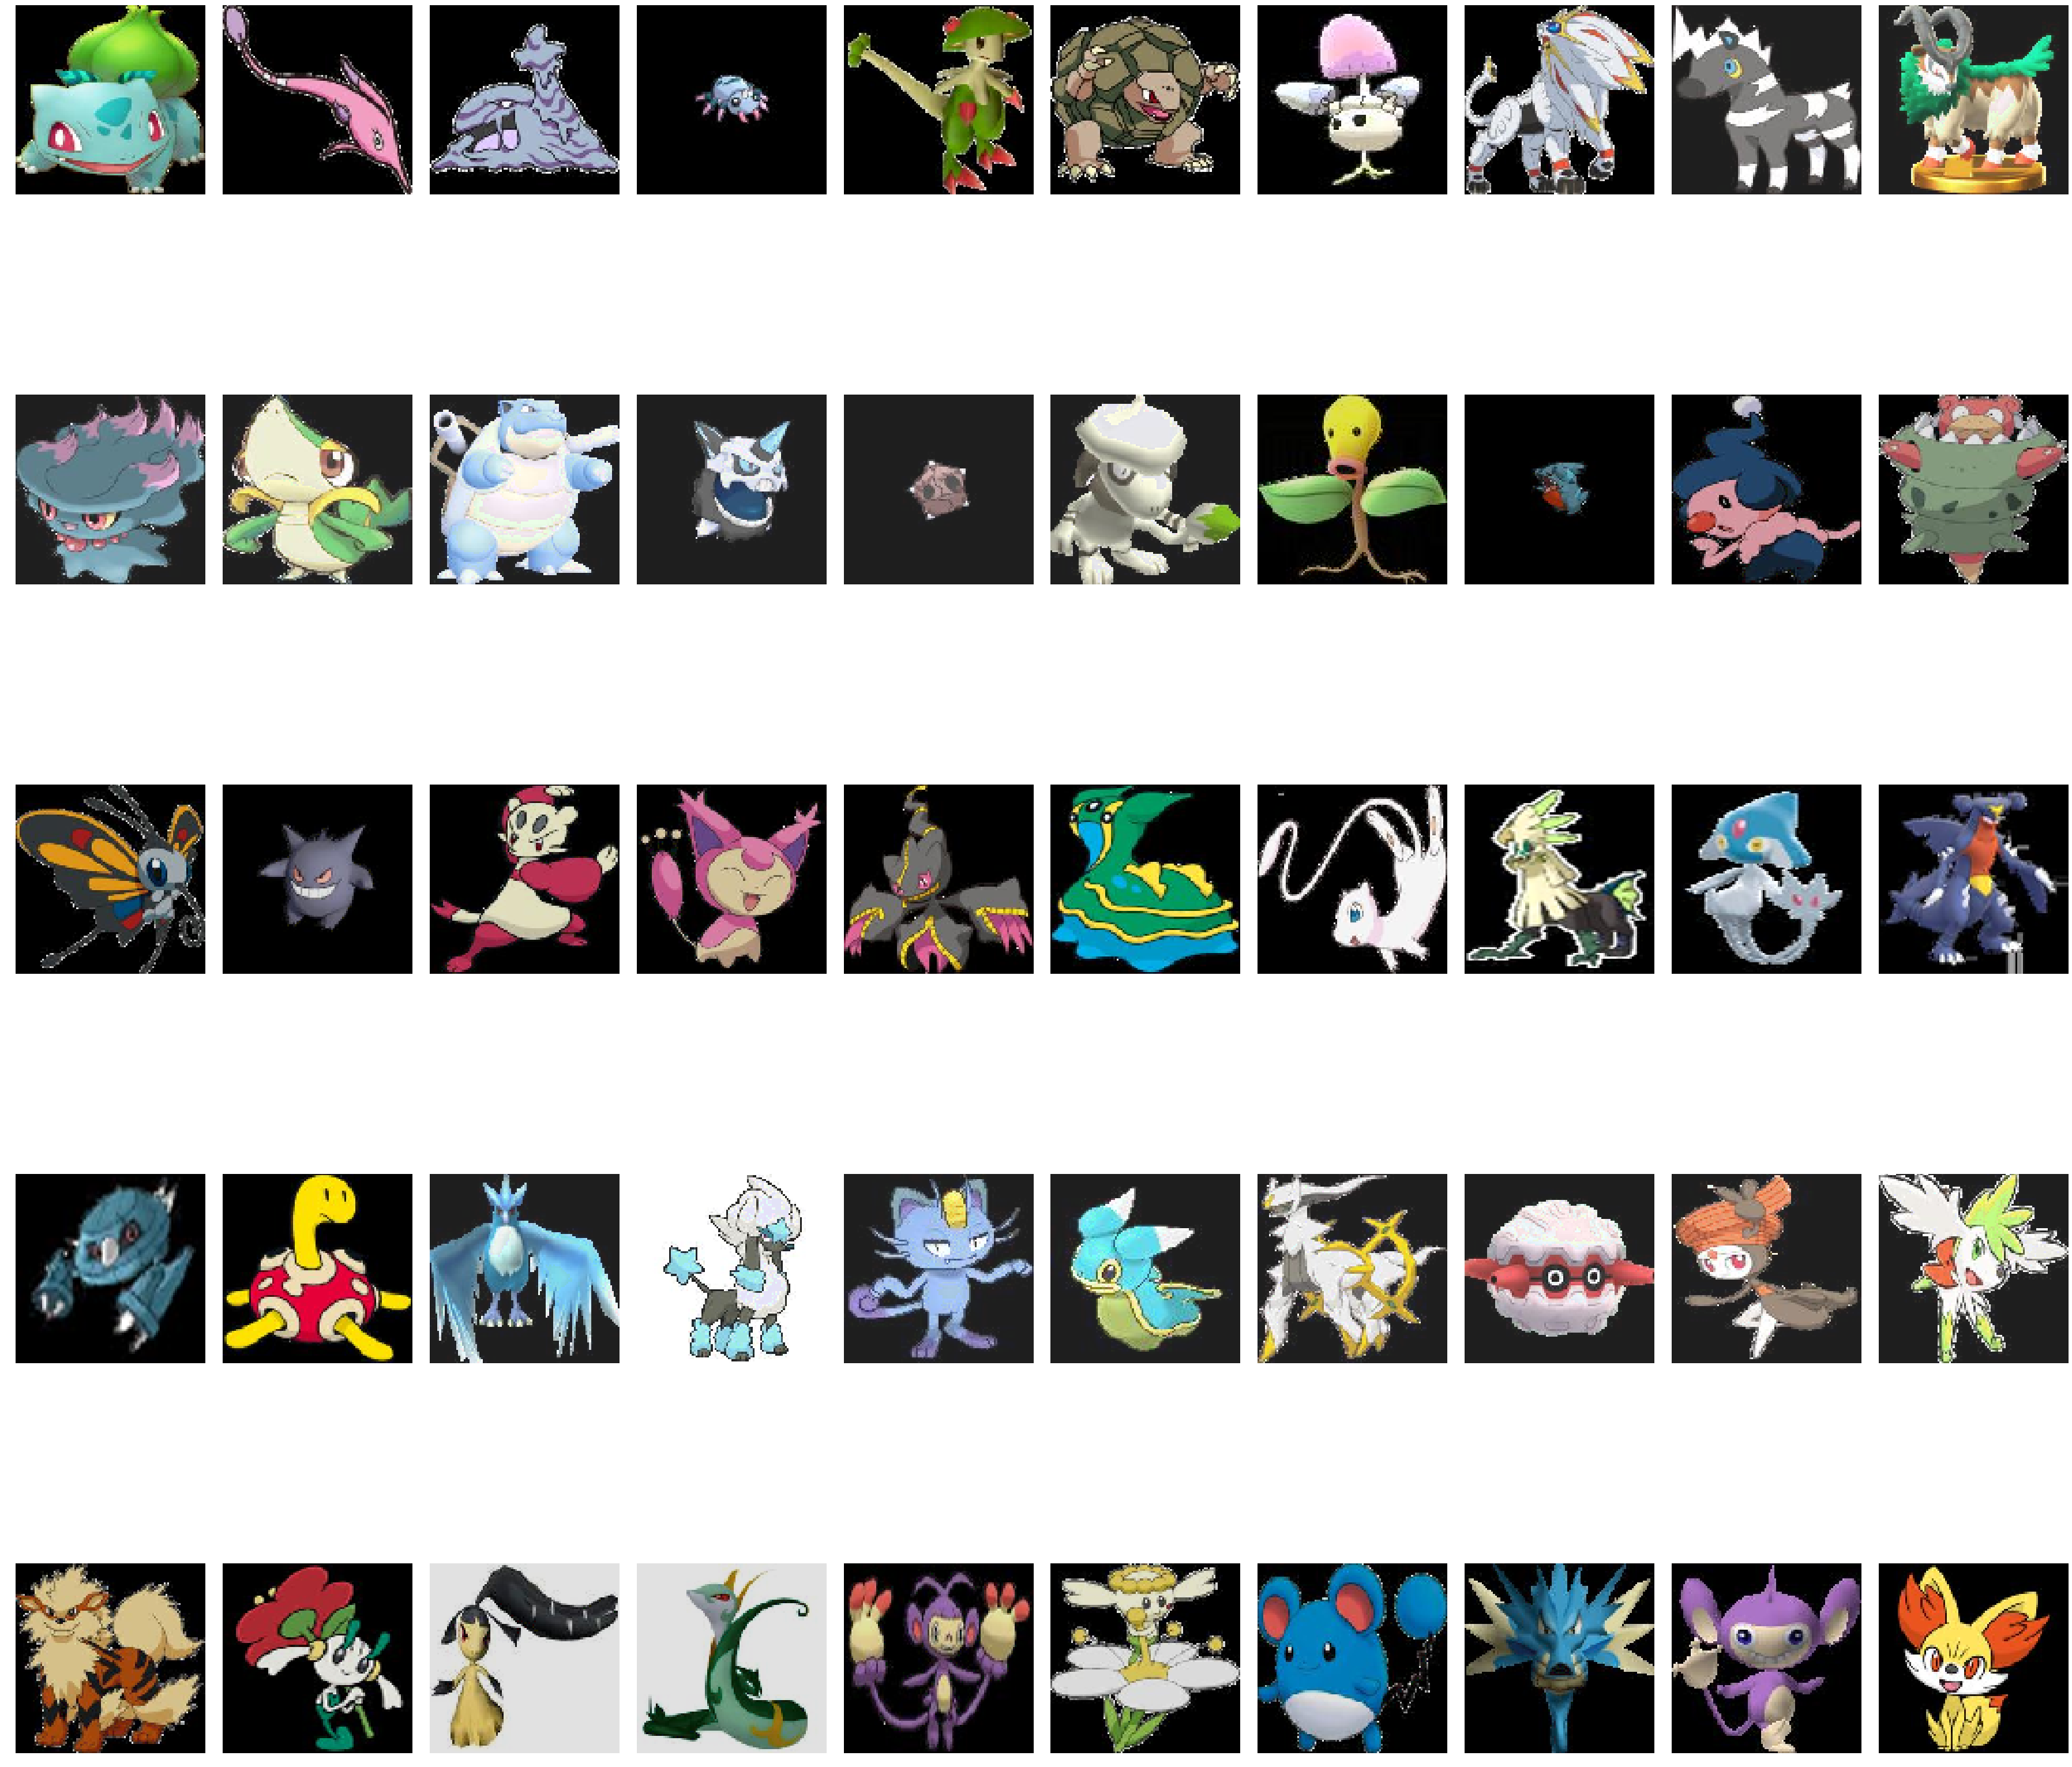

In [4]:

labels = pd.read_csv('poke_image_labels_96k.csv', header = 'infer')
data = np.load("poke96k.npy")


# example_pic = Image.fromarray(image[10:60,20:80:], 'RGB')
# example_pic = Image.fromarray(image3, 'RGB')
# plt.imshow(example_pic)

#How do the labels look like? Example:
labels.iloc[3951+6036*6]

fig=plt.figure(figsize=(50, 50))
for i in range(0, 50):
    example_pic = Image.fromarray(data[i*1500+500], 'RGB')
    fig.add_subplot(5, 10, i+1)
    plt.imshow(example_pic)
    plt.axis('off')
    
plt.tight_layout()
plt.show()

## ConvNet
We will not develop our convolutional neural network from the ground up but instead use tensorflow with a gpu to speed up the training. 

[architecture](https://colab.research.google.com/github/margaretmz/deep-learning/blob/master/fashion_mnist_keras.ipynb#scrollTo=QwNmlfIC0YxM)

[multy label](https://www.depends-on-the-definition.com/guide-to-multi-label-classification-with-neural-networks/)

[C-Far architecture](http://parneetk.github.io/blog/cnn-cifar10/)

In [1]:
###Test for Tensorflow install 
import tensorflow as tf
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from PIL import Image
import time
import gc

### Shuffle and split data set. 
<div class="alert alert-success">
Warning requires 16GB of memory to execute next box
</div>

In [2]:
# labels = pd.read_csv('poke_image_labels.csv', header = 'infer')

# type_dict = dict()
# j = 0
# for i in range(len(labels)):
#     type1 = str(labels.iat[i,1]) +"/"+ str(labels.iat[i,2])
#     type2 = str(labels.iat[i,2]) +"/"+ str(labels.iat[i,1])
#     if(type1 not in type_dict):
#         type_dict[type1] = j
#         type_dict[type2] = j
#         j+=1
# print(str(j) + " Numer of used types in the data")

# labels = pd.read_csv('poke_image_labels_96k.csv', header = 'infer')
# data = np.load("poke96k.npy")

# dl = []
# for i in range(data.shape[0]):
#     type1 = str(labels.iat[i,1]) +"/"+ str(labels.iat[i,2])
#     dl.append([data[i],labels.iat[i,0],type_dict[type1]])
    
# data = None
# labels = None
# np.random.shuffle(dl)
# dl[0]

# dl = np.array(dl)
# dl.shape

# #split data 
# np.save("poke_train.npy", dl[:65000])
# np.save("poke_valid.npy", dl[65000:80000])
# np.save("poke_test.npy", dl[80000:])


136 Numer of used types in the data


In [2]:
train = np.load("poke_train.npy")
valid =  np.load("poke_valid.npy")


In [3]:
x_train = np.array(train[:,0].tolist()).astype('uint8')
y_train = train[:,2]
x_valid = np.array(valid[:,0].tolist()).astype('uint8')
y_valid = valid[:,2]

del train 
del valid  
gc.collect()

27

In [4]:
# Print training set shape 
print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)

# Print the number of training and test datasets
print(x_train.shape[0], 'train set')
print(x_valid.shape[0], 'validation set')
# print(x_test.shape[0], 'test set')



x_train shape: (65000, 100, 100, 3) y_train shape: (65000,)
65000 train set
15000 validation set


In [5]:
# Load the text lables 
poke_labels = np.load("poke_lables.npy")
print(len(poke_labels))

136


type = 18 fairy/nan


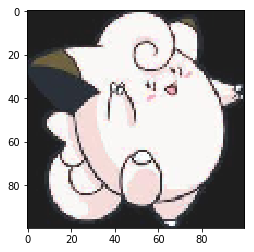

In [6]:
# Image index, you can pick any number between 0 and 64,999
img_index = 22000
# y_train contains the lables, ranging from 0 to 18
label_index = y_train[img_index]
# Print the label, for example 2 Pullover
print ("type = " + str(label_index) + " " +(poke_labels[label_index]))
# # Show one of the images from the training dataset
plt.imshow(x_train[img_index])

In [7]:
#normalize all values
x_train = x_train.astype('float32') / 255
x_valid = x_valid.astype('float32') / 255

In [8]:
# One-hot encode the labels
y_train = tf.keras.utils.to_categorical(y_train, 136)
y_valid = tf.keras.utils.to_categorical(y_valid, 136)

# Print training set shape
print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)

# Print the number of training, validation, and test datasets
print(x_train.shape[0], 'train set')
print(x_valid.shape[0], 'validation set')

x_train shape: (65000, 100, 100, 3) y_train shape: (65000, 136)
65000 train set
15000 validation set


In [9]:
model = tf.keras.Sequential()

# Must define the input shape in the first layer of the neural network
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(5,5), padding='same', activation='relu', input_shape=(100,100,3))) 
model.add(tf.keras.layers.MaxPooling2D(pool_size=(4,4)))
model.add(tf.keras.layers.Dropout(0.3))

model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(5,5), padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(4,4)))
model.add(tf.keras.layers.Dropout(0.3))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(136, activation='softmax'))

# Take a look at the model summary
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 100, 100, 64)      4864      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 25, 25, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 25, 25, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 25, 25, 32)        51232     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 32)          0         
_________________________________________________________________
dropout_1 (Dropout)  

In [10]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [11]:
# x_valid, y_valid = x_test, y_test
NAME = "Poke_logs-{}".format(str(int(time.time())))
tensorboard = tf.keras.callbacks.TensorBoard(log_dir='logs/{}'.format(NAME))

checkpointer = tf.keras.callbacks.ModelCheckpoint(filepath='modelbestweights.hdf5', verbose = 1, save_best_only=True)
model_info = model.fit(x_train,
                     y_train,
                     batch_size=256,
                     epochs=20,
                     validation_data=(x_valid, y_valid),
                     callbacks=[checkpointer,tensorboard])

Train on 65000 samples, validate on 15000 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/20
64768/65000 [============================>.] - ETA: 0s - loss: 3.8715 - acc: 0.1493
Epoch 00001: val_loss improved from inf to 3.31285, saving model to modelbestweights.hdf5
65000/65000 [==============================] - 31s 473us/sample - loss: 3.8703 - acc: 0.1494 - val_loss: 3.3129 - val_acc: 0.2581
Epoch 2/20
64768/65000 [============================>.] - ETA: 0s - loss: 2.9714 - acc: 0.2746
Epoch 00002: val_loss improved from 3.31285 to 2.16108, saving model to modelbestweights.hdf5
65000/65000 [==============================] - 26s 403us/sample - loss: 2.9700 - acc: 0.2749 - val_loss: 2.1611 - val_acc: 0.4592
Epoch 3/20
64768/65000 [============================>.] - ETA: 0s - loss: 2.3116 - acc: 0.3951
Epoch 00003: val_loss improved from 2.16108 to 1.48841, saving model to modelbestweights.hdf5
65000/65000 [==============================] - 27s 410us/sample - loss: 2.3107 

In [12]:
#free some memory
del x_train
del y_train
del x_valid
del y_valid 
gc.collect()

70

In [13]:
# Load the weights with the best validation accuracy
model.load_weights('modelbestweights.hdf5')

In [14]:
# Evaluate the model on test set
test =  np.load("poke_test.npy")
x_test = np.array(test[:,0].tolist())
y_names = test[:,1]
y_test = test[:,2]
del test
x_test = x_test.astype('float32') / 255
y_test = tf.keras.utils.to_categorical(y_test, 136)
score = model.evaluate(x_test, y_test, verbose=0)

# Print test accuracy
print('\n', 'Test accuracy:', score[1])


 Test accuracy: 0.9739249


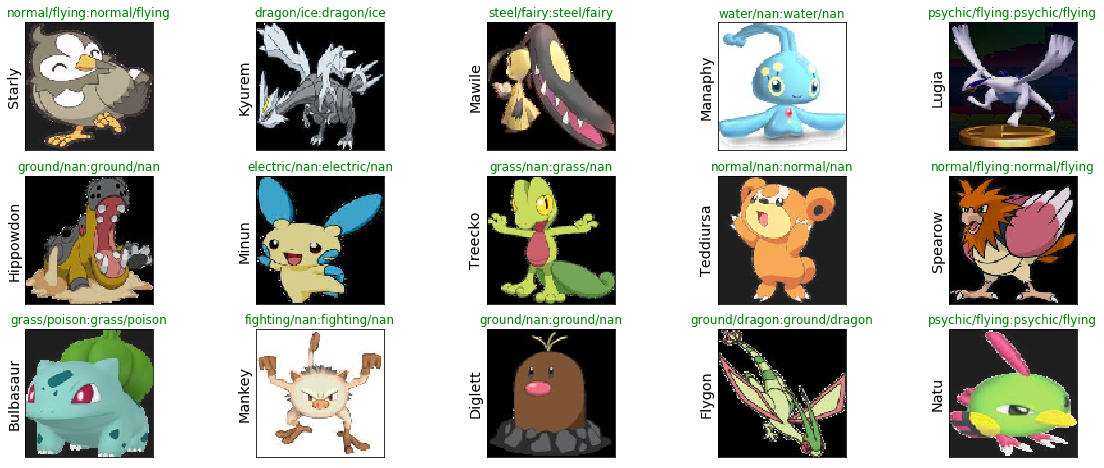

In [15]:
y_hat = model.predict(x_test)

# Plot a random sample of 10 test images, their predicted labels and ground truth
figure = plt.figure(figsize=(20, 8))
for i, index in enumerate(np.random.choice(x_test.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    # Display each image
    ax.imshow(np.squeeze(x_test[index]))
    predict_index = np.argmax(y_hat[index])
    true_index = np.argmax(y_test[index])
    # Set the title for each image
    ax.set_title("{}:{}".format(poke_labels[predict_index],poke_labels[true_index]),
                                  color=("green" if predict_index == true_index else "red"))
    ax.set_ylabel(y_names[index],fontsize='x-large')